In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.7/ (Recommended version – 3.7).
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.10.12
numpy version: 1.26.4
pandas version:  2.2.2
seaborn version: 0.13.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# Classification with [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


## classification on fruit with colours dataset

### download and load dataset

Source (Github): https://raw.githubusercontent.com/rocksaint/fruit-data-with-colours/master/fruit_data_with_colours.csv

In [ ]:
# download sample file
#!wget https://raw.githubusercontent.com/rocksaint/fruit-data-with-colours/master/fruit_data_with_colours.csv

In [ ]:
# load data
fruits_data=pd.read_csv('https://raw.githubusercontent.com/rocksaint/fruit-data-with-colours/master/fruit_data_with_colours.csv',
                        sep=',')
# see head
fruits_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
# see tail
fruits_data.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [ ]:
# shape of data
fruits_data.shape# row, columns

(59, 7)

In [ ]:
# see column names
fruits_data.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

### dataset info and stats

In [ ]:
# see data info
fruits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
# see column types only
fruits_data.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [ ]:
# stats of data
fruits_data.describe()# only for numerical columns

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [ ]:
# stats of data
fruits_data.describe(include=object)# only for strings columns

,fruit_name,fruit_subtype
count,59,59
unique,4,10
top,apple,turkey_navel
freq,19,10


### get classes (fruit names) and their counts

In [ ]:
# find all unique values in "fruit_name" and "fruit_subtype" columns
fruits_data['fruit_name'].unique()#fruits_data.fruit_name..unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [ ]:
# see unique value counts in 'fruit_label'
fruits_data['fruit_label'].value_counts()# same as 'fruit_label'

1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

In [ ]:
# see unique value counts for 'fruit_name'
fruits_data['fruit_name'].value_counts()# same as 'fruit_label'

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

### seach for null values

"unknown" in furit sub-types

In [ ]:
# see unique value counts for 'fruit_subtype'
fruits_data['fruit_subtype'].value_counts()

turkey_navel        10
unknown             10
cripps_pink          6
selected_seconds     6
spanish_belsan       6
mandarin             5
braeburn             5
golden_delicious     5
granny_smith         3
spanish_jumbo        3
Name: fruit_subtype, dtype: int64

In [ ]:
# see unique value counts (overall)
fruits_data[['fruit_name','fruit_subtype']].value_counts()

fruit_name  fruit_subtype   
lemon       unknown             10
orange      turkey_navel        10
apple       cripps_pink          6
lemon       spanish_belsan       6
orange      selected_seconds     6
apple       braeburn             5
            golden_delicious     5
mandarin    mandarin             5
apple       granny_smith         3
orange      spanish_jumbo        3
dtype: int64

In [ ]:
# mode for 'fruit_subtype' for 'lemon' is 'spanish_belsan'
#fruits_data['fruit_subtype'].mask(fruits_data['fruit_subtype']=='unknown','spanish_belsan')
# or easy method (make a changes in copy)
#fruits_data_copy=fruits_data.replace(to_replace='unknown',value='spanish_belsan',inplace=False)# create copy of dataframe
# change orginal data
fruits_data.replace(to_replace='unknown',value='spanish_belsan',inplace=True)# make changes in orginal data frame dataframe
# more safe
#fruits_data['fruit_subtype'].replace(to_replace='unknown',value='spanish_belsan',inplace=False)
# see changes - see unique value counts (overall)
fruits_data[['fruit_name','fruit_subtype']].value_counts()

fruit_name  fruit_subtype   
lemon       spanish_belsan      16
orange      turkey_navel        10
apple       cripps_pink          6
orange      selected_seconds     6
apple       braeburn             5
            golden_delicious     5
mandarin    mandarin             5
apple       granny_smith         3
orange      spanish_jumbo        3
dtype: int64

### make label encoding on fruit_subtype

In [ ]:
# how label encoding is done
#sorted(set(fruits_data['fruit_subtype'].to_list()))
# load labelencoder
from sklearn.preprocessing import LabelEncoder

# make encoder (object)
encoder=LabelEncoder()
# make fit
#encoder.fit(fruits_data['fruit_subtype'])# get unique values from data and assign labels
# make transform (convert to labels)
#fruit_subtype_encoded=encoder.transform(fruits_data['fruit_subtype'])
# make fit and transform
fruits_data['fruit_subtype_labels']=encoder.fit_transform(fruits_data['fruit_subtype'])# overwrite
{class_:index for index,class_ in enumerate(encoder.classes_)}# see all clases labels

{'braeburn': 0,
 'cripps_pink': 1,
 'golden_delicious': 2,
 'granny_smith': 3,
 'mandarin': 4,
 'selected_seconds': 5,
 'spanish_belsan': 6,
 'spanish_jumbo': 7,
 'turkey_navel': 8}

In [ ]:
# see head of dataset
fruits_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,fruit_subtype_labels
0,1,apple,granny_smith,192,8.4,7.3,0.55,3
1,1,apple,granny_smith,180,8.0,6.8,0.59,3
2,1,apple,granny_smith,176,7.4,7.2,0.60,3
3,2,mandarin,mandarin,86,6.2,4.7,0.80,4
4,2,mandarin,mandarin,84,6.0,4.6,0.79,4


### make data split using ([sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

In [ ]:
# make data split
from sklearn.model_selection import train_test_split

# make data split
Xtrain,Xtest,ytrain,ytest=train_test_split(fruits_data.iloc[:,3:],fruits_data['fruit_label'],
                                           test_size=0.2)
# see shape (pandas dataframe and series)
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((47, 5), (47,), (12, 5), (12,))

### Make classification using - [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Logistic Regression (aka logit, MaxEnt) classifier.

In [ ]:
# load Logistic regression class
from sklearn.linear_model import LogisticRegression

# make model (object)
lClf=LogisticRegression(max_iter=10000)# ConvergenceWarning -  TOTAL NO. of ITERATIONS REACHED LIMIT.
# make model train
lClf.fit(Xtrain,ytrain)
# see hyperperameter
print('Coefficient: (shape)',lClf.coef_.shape)# five different equations
print('Intercept:',lClf.intercept_)
print('Score (on training data):',lClf.score(Xtrain,ytrain))
print('Score (on testing data):',lClf.score(Xtest,ytest))

Coefficient: (shape) (4, 5)
Intercept: [ -4.47499606  24.61763535  -9.93007474 -10.21256455]
Score (on training data): 1.0
Score (on testing data): 1.0


### elaborate results

In [ ]:
# take sample
# Xtest[:2] - first two samples
# ytest[:2] - first two true values
# by our build in model
print('True values:',ytest[:2].values)
print('Predictions:',lClf.predict(Xtest[:2]))

True values: [1 1]
Predictions: [1 1]


In [ ]:
# manual calculation -
# yn = 1 / (1 + e^(-yn`))
# equation 1 - y1` = m11x1+m12x2+m13x3+m14x4+m15x5+c1
y1_dash=np.sum(Xtest.iloc[1]*lClf.coef_[0])+lClf.intercept_[0]
y1= 1 / (1 + np.power(np.e,-1*y1_dash))
print('Y1:',np.round(y1,6))
# equation 2 - y2` = m21x1+m22x2+m23x3+m24x4+m25x5+c2
y2_dash=np.sum(Xtest.iloc[1]*lClf.coef_[1])+lClf.intercept_[1]
y2= 1 / (1 + np.power(np.e,-1*y2_dash))
print('Y2:',np.round(y2,6))
# equation 3 - y3` = m31x1+m32x2+m33x3+m34x4+m35x5+c3
y3_dash=np.sum(Xtest.iloc[1]*lClf.coef_[2])+lClf.intercept_[2]
y3= 1 / (1 + np.power(np.e,-1*y3_dash))
print('Y2:',np.round(y3,6))
# equation 4 - y4` = m41x1+m42x2+m43x3+m44x4+m45x5+c4
y4_dash=np.sum(Xtest.iloc[1]*lClf.coef_[3])+lClf.intercept_[3]
y4= 1 / (1 + np.power(np.e,-1*y4_dash))
print('Y4:',np.round(y4,6))

Y1: 0.999579
Y2: 1.3e-05
Y2: 0.769765
Y4: 0.904083


## classification on [toy dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html) - [IRIS](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

Load and return the iris dataset (classification). The iris dataset is a classic and very easy multi-class classification dataset.

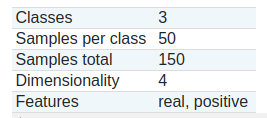

Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

### make load dataset

In [2]:
from sklearn.datasets import load_iris                                          # load iris data loading method
# Source: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

iris=load_iris()                                                                # make load data
print('Dataset object:',type(iris))                                             # see type of object returned

Dataset object: <class 'sklearn.utils._bunch.Bunch'>


In [3]:
print('Dataset Info:\n',iris.DESCR)                                             # make print dataset info

Dataset Info:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of

In [4]:
print('See type of data (inputs):',type(iris.data))                             # see type of data object
print('See type of targets (outputs):',type(iris.target))                       # see type of target object

See type of data (inputs): <class 'numpy.ndarray'>
See type of targets (outputs): <class 'numpy.ndarray'>


In [5]:
print('See shape of data (inputs):',iris.data.shape)                            # shape of inputs (X) -> (row, columns)
# Row -> samples or number of instances
# Columns -> features or number of attributes
print('Feature (column) names:',iris.feature_names)                             # print feature names
print('See shape of targets:',iris.target.shape)                                # see shape of targets (y) -> (samples, )
print('Unique labels in targets:',np.sort(np.unique(iris.target)))              # see all unique labels
print('Unique labels names:',iris.target_names)                                 # see target names -> index represent label

See shape of data (inputs): (150, 4)
Feature (column) names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
See shape of targets: (150,)
Unique labels in targets: [0 1 2]
Unique labels names: ['setosa' 'versicolor' 'virginica']


In [6]:
decoder:dict={index:label for index,label in enumerate(iris.target_names)}      # make label decoder - label index to label names
encoder:dict={label:index for index,label in enumerate(iris.target_names)}      # make label encoder - label name to label index
print('Label decoder:',decoder)                                                 # see label decoder
print('Label encoder:',encoder)                                                 # see label encoder

Label decoder: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
Label encoder: {'setosa': 0, 'versicolor': 1, 'virginica': 2}


### make dataframe from data

In [7]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)                 # make dataframe
iris_df.head()                                                                  # see head of data (first five rows)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df['target']=iris.target                                                   # add target column
iris_df.tail()                                                                  # see tail of data (last five rows, default)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
iris_df.info()                                                                  # see dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
iris_df.dtypes.value_counts()                                                   # see each data types counts

,count
float64,4
int64,1


In [11]:
# As all values are numerical, thus only pandas.isna is enough to check for null values check / count
iris_df.isna().sum()                                                            # detect missing values for an array-like object

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [12]:
iris_df.isna().sum().sum()                                                      # total null count
# This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT
#   in datetimelike). Source: https://pandas.pydata.org/docs/reference/api/pandas.isna.html
# Also numpy.isna - Test element-wise for NaN and return result as a boolean array. Source: https://numpy.org/doc/stable/reference/generated/numpy.isnan.html

0

### Calculate feature importance by [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

In [13]:
print('Target names:',iris.target_names)                                        # target names
for label,className in enumerate(iris.target_names):                            # make print each class and its label
  print('\t',className,'->',label)                                              # make print class name and it label

Target names: ['setosa' 'versicolor' 'virginica']
	 setosa -> 0
	 versicolor -> 1
	 virginica -> 2


In [27]:
# Label decode targets from labels to class names
iris_df['target_names']=iris_df['target'].apply(lambda label: iris.target_names[label])# add target name column
iris_df.head()                                                                  # see first five rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


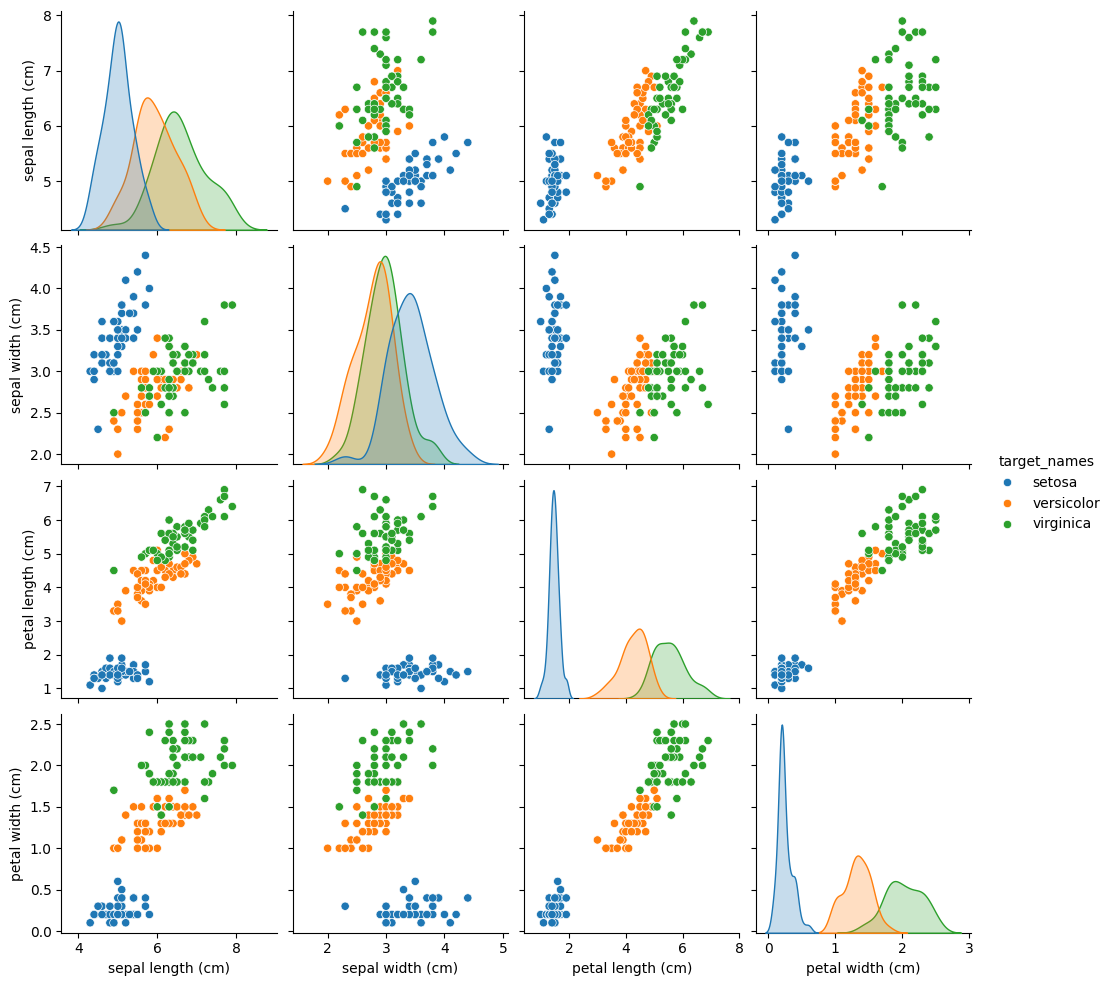

In [15]:
sns.pairplot(iris_df.drop(columns='target'),hue='target_names')#palette=['red','green','blue']# make pair plot
plt.show()                                                                      # make show plot

In [16]:
#iris_df.drop(columns='target_names',inplace=True)                               # make removed target name columns

### plot feature-wise [box and whisker](https://seaborn.pydata.org/generated/seaborn.boxplot.html) plot

https://en.wikipedia.org/wiki/Box_plot

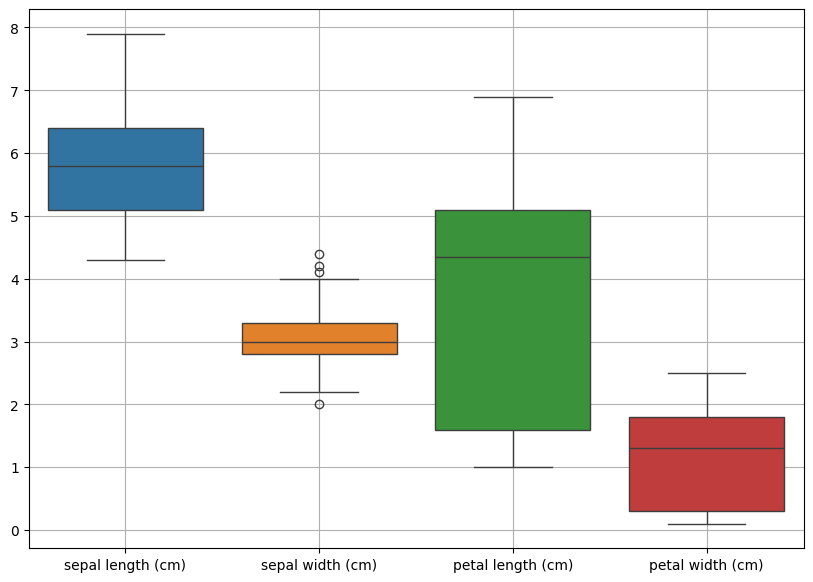

In [28]:
plt.figure(figsize=(10,7))                                                      # make set figure size
sns.boxplot(iris_df.drop(columns=['target','target_names']))                    # make box plot
plt.grid()                                                                      # add grid to plot
plt.show()                                                                      # make show plot

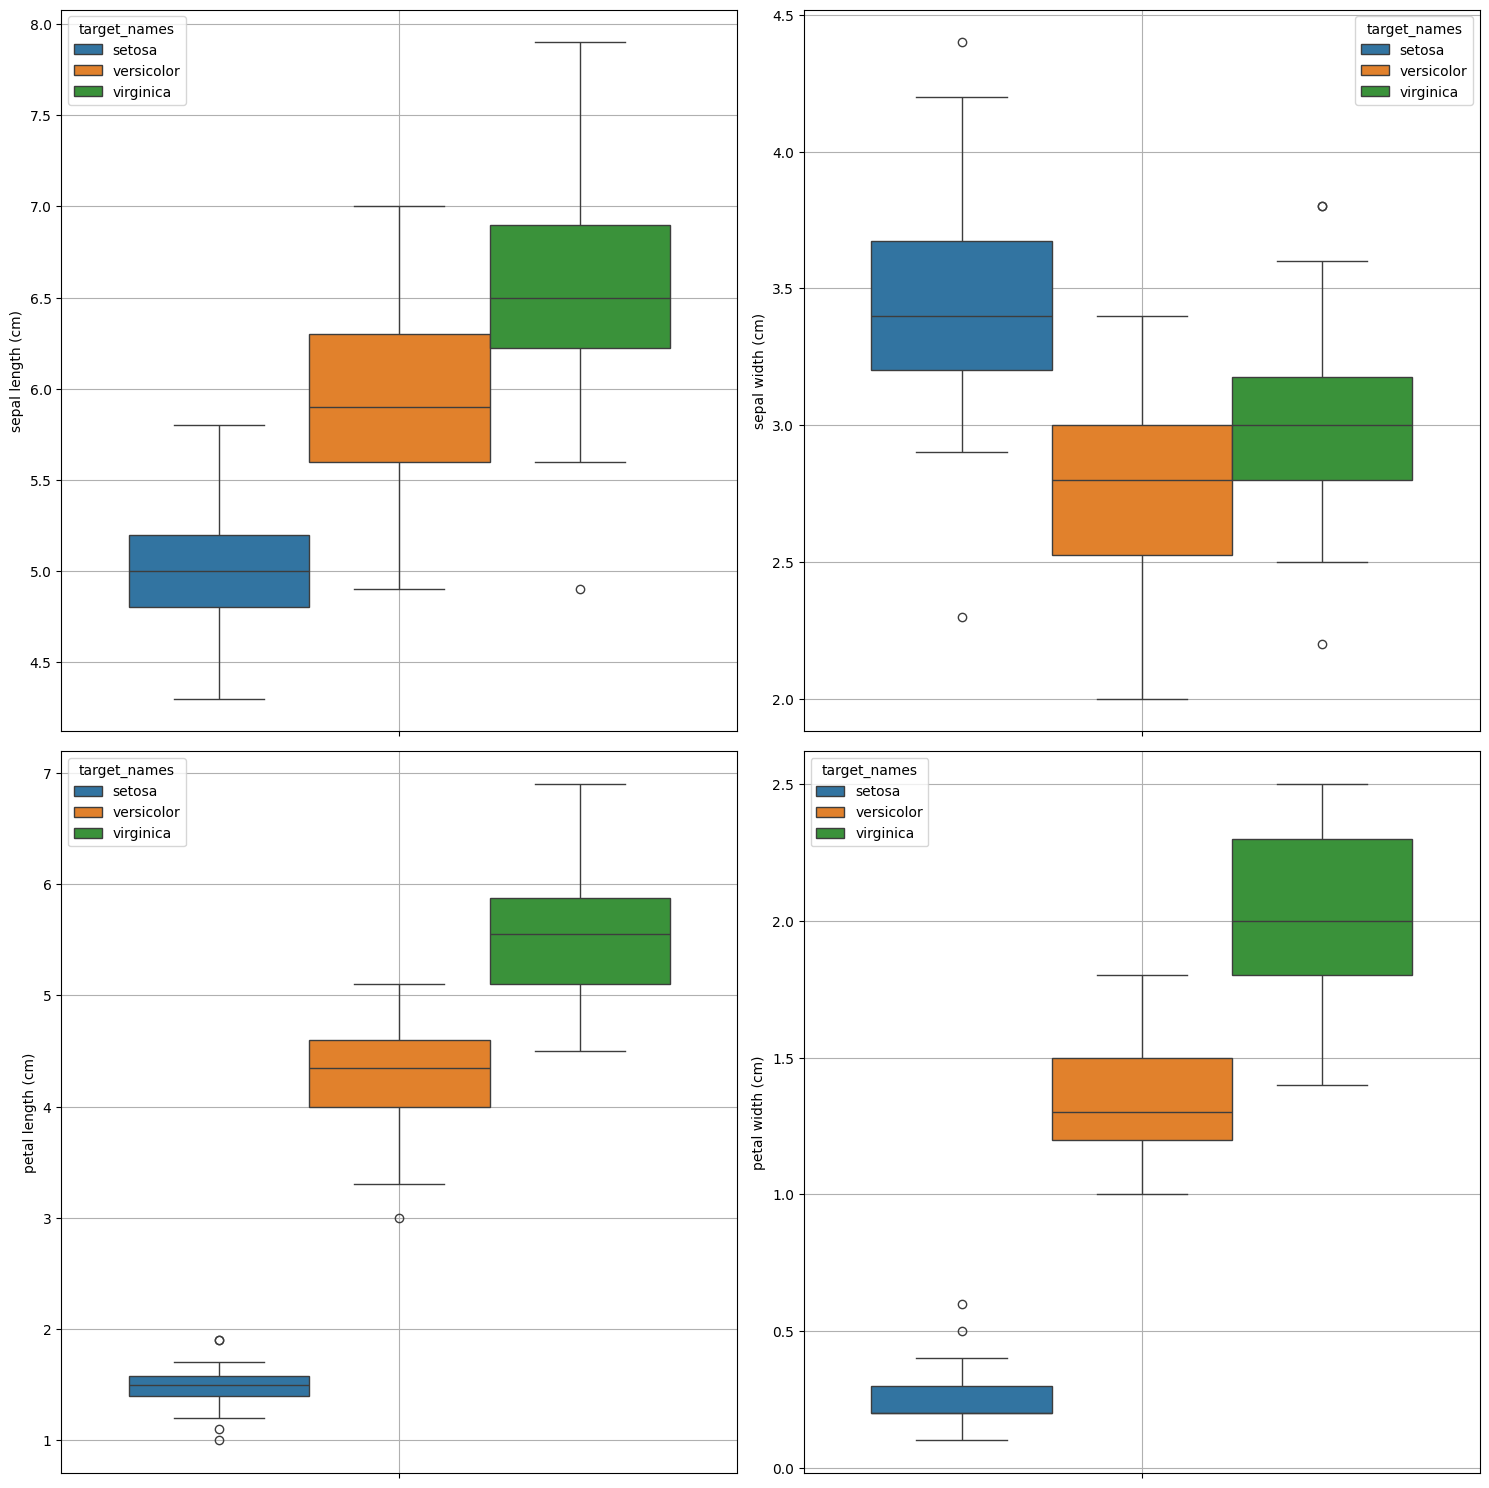

In [35]:
plt.figure(figsize=(15,15))                                                     # make set figure size
for index,column in enumerate(iris_df.drop(columns=['target_names','target']).columns):# get each column (only features)
  plt.subplot(2,2,index+1)                                                      # make subplot - 2 rows and 2 columns
  sns.boxplot(iris_df,y=column,hue='target_names')                              # make box plot
  plt.grid()                                                                    # add grid to plot
plt.tight_layout()                                                              # adjust the padding between and around subplots
plt.show()                                                                      # make show plot

In [40]:
iris_df.drop(columns='target_names',inplace=True)                               # make removed target name columns

### feature importance by correlation ([pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html))

Compute pairwise correlation of columns, excluding NA/null values.

In [17]:
iris_df.corr()                                                                  # calculate correlation (all)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [20]:
iris_df.corr()['target'].iloc[:-1]                                              # calculate correlation (only for targets)

,target
sepal length (cm),0.782561
sepal width (cm),-0.426658
petal length (cm),0.949035
petal width (cm),0.956547


### plot [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for correlation scores

Source: [Annotated heatmaps](https://seaborn.pydata.org/examples/spreadsheet_heatmap.html)

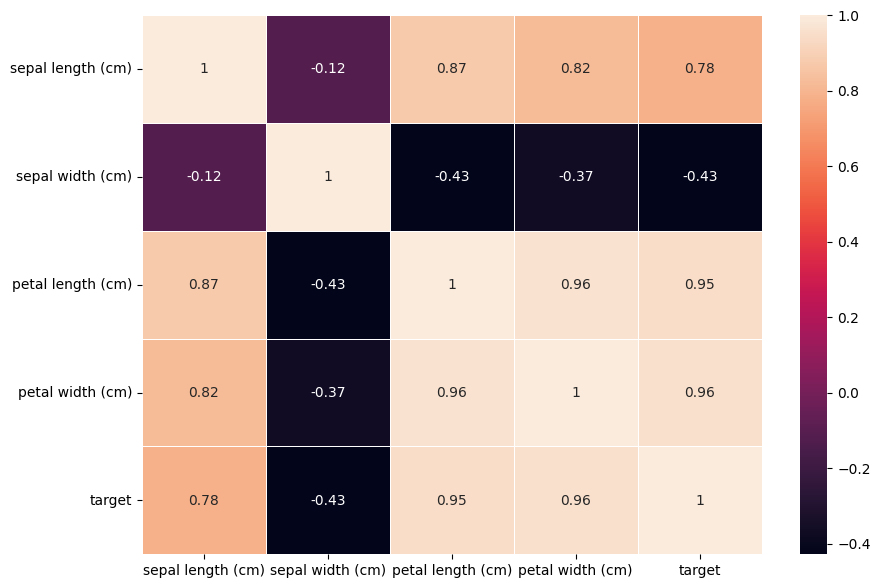

In [21]:
plt.figure(figsize=(10,7))                                                      # make figure
sns.heatmap(data=iris_df.corr(),annot=True,fmt='.2g',linewidths=0.5)            # plot heatmap
# (.2g - 2 significant digits) or (.2f for 2 digits after decimal points)
plt.show()                                                                      # make plot show

### feature importance by [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2)

**NOT WORK - only for positive data values**

In [43]:
from sklearn.feature_selection import chi2                                      # load chi2 method

score_chi2,p_value=chi2(iris_df.iloc[:,:-1],iris_df['target'])                  # calculate score
score_chi2=score_chi2/score_chi2.max()                                          # normalize score
score_chi2                                                                      # see score

array([0.09300643, 0.03190306, 1.        , 0.57644961])

### feature importance by [f_classif (f-score)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)

**Compute the ANOVA F-value for the provided sample.**

In [44]:
from sklearn.feature_selection import f_classif                                 # load f-score for classification method

score_f,p_value=f_classif(iris_df.iloc[:,:-1],iris_df['target'])                # calculate score
score_f=score_f/score_f.max()                                                   # normalize score
score_f                                                                         # see score

array([0.10105781, 0.04165536, 1.        , 0.81345426])

### feature importance by [klearn.feature_selection.mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

**Estimate mutual information for a discrete target variable.**

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [46]:
from sklearn.feature_selection import mutual_info_classif                       # load mutual info for classification method

score_mi=mutual_info_classif(iris_df.iloc[:,:-1],iris_df['target'])             # calculate score
score_mi=score_mi/score_mi.max()                                                # normalize score
score_mi                                                                        # see score

array([0.53589385, 0.22985612, 1.        , 0.99530496])

### collect all feature scores

In [48]:
score=pd.DataFrame(data={'corr':iris_df.corr()['target'][:-1],'chi2':score_chi2,'f-score':score_f,'mi-score':score_mi})# make pandas dataframe
score                                                                           # see results

,corr,chi2,f-score,mi-score
sepal length (cm),0.782561,0.093006,0.101058,0.535894
sepal width (cm),-0.426658,0.031903,0.041655,0.229856
petal length (cm),0.949035,1.000000,1.000000,1.000000
petal width (cm),0.956547,0.576450,0.813454,0.995305


### split dataset using [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

In [51]:
from sklearn.model_selection import train_test_split                            # split data

Xtrain,Xtest,ytrain,ytest=train_test_split(iris_df.drop(columns='target'),iris_df['target'],test_size=0.33)# split data (as pandas dataframe and series)
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape                               # see shape

((100, 4), (100,), (50, 4), (50,))

### Compare feature selection results

**make classification using BEST one feature**

In [52]:
from sklearn.linear_model import LogisticRegression                             # load classifier module - LogisticRegression - on BEST one feature

lClf=LogisticRegression()                                                       # make model (object)
lClf.fit(Xtrain[['petal width (cm)']],ytrain)                                   # make model train
print('Training accuracy:',lClf.score(Xtrain[['petal width (cm)']],ytrain))     # calculate training accuracy
print('Test accuracy:',lClf.score(Xtest[['petal width (cm)']],ytest))           # calculate testing accuracy

Training accuracy: 0.96
Test accuracy: 0.96


**make classification using WORSE one feature**

In [53]:
from sklearn.linear_model import LogisticRegression                             # load classifier module - LogisticRegression - on WORSE one feature

lClf=LogisticRegression()                                                       # make model (object)
lClf.fit(Xtrain[['sepal width (cm)']],ytrain)                                   # make model train
print('Training accuracy:',lClf.score(Xtrain[['sepal width (cm)']],ytrain))     # calculate training accuracy
print('Test accuracy:',lClf.score(Xtest[['sepal width (cm)']],ytest))           # calculate testing accuracy

Training accuracy: 0.58
Test accuracy: 0.6


**make classification using BEST two feature**

In [55]:
from sklearn.linear_model import LogisticRegression                             # load classifier module - LogisticRegression - on BEST two feature

lClf=LogisticRegression()                                                       # make model (object)
lClf.fit(Xtrain[['petal width (cm)','petal length (cm)']],ytrain)               # make model train
print('Training accuracy:',lClf.score(Xtrain[['petal width (cm)','petal length (cm)']],ytrain))# calculate training accuracy
print('Test accuracy:',lClf.score(Xtest[['petal width (cm)','petal length (cm)']],ytest))# calculate testing accuracy

Training accuracy: 0.96
Test accuracy: 0.96


**make classification using WORSE two feature**

In [56]:
from sklearn.linear_model import LogisticRegression                             # load classifier module - LogisticRegression - on WORSE two feature

lClf=LogisticRegression()                                                       # make model (object)
lClf.fit(Xtrain[['sepal length (cm)','sepal width (cm)']],ytrain)               # make model train
print('Training accuracy:',lClf.score(Xtrain[['sepal length (cm)','sepal width (cm)']],ytrain))# calculate training accuracy
print('Test accuracy:',lClf.score(Xtest[['sepal length (cm)','sepal width (cm)']],ytest))# calculate testing accuracy

Training accuracy: 0.78
Test accuracy: 0.86


**make classification using BEST three feature**

In [57]:
from sklearn.linear_model import LogisticRegression                             # load classifier module - LogisticRegression - on BEST three feature

lClf=LogisticRegression()                                                       # make model (object)
lClf.fit(Xtrain[['petal width (cm)','petal length (cm)','sepal length (cm)']],ytrain)# make model train
print('Training accuracy:',lClf.score(Xtrain[['petal width (cm)','petal length (cm)','sepal length (cm)']],ytrain))# calculate training accuracy
print('Test accuracy:',lClf.score(Xtest[['petal width (cm)','petal length (cm)','sepal length (cm)']],ytest))# calculate testing accuracy

Training accuracy: 0.96
Test accuracy: 0.96


**make classification using all features**

In [58]:
from sklearn.linear_model import LogisticRegression                             # load classifier module - LogisticRegression - on all feature

lClf=LogisticRegression()                                                       # make model (object)
lClf.fit(Xtrain,ytrain)                                                         # make model train
print('Training accuracy:',lClf.score(Xtrain,ytrain))                           # calculate training accuracy
print('Test accuracy:',lClf.score(Xtest,ytest))                                 # calculate testing accuracy

Training accuracy: 0.96
Test accuracy: 0.96


### [Classification Report](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html) and [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Source: [class sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

- Classification Report: Build a text report showing the main classification metrics.
- Confusion Matrix: Compute confusion matrix to evaluate the accuracy of a classification.

In [63]:
ypredict=lClf.predict(Xtest)                                                    # make predictions

In [64]:
from sklearn.metrics import classification_report                               # load classification report function
print('Classification report:\n',classification_report(ytest,ypredict,target_names=iris.target_names))# make print classification report

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.89      0.94        18

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [65]:
from sklearn.metrics import confusion_matrix                                    # load confusion matrix function
print('Confusion Matrix:\n',confusion_matrix(ytest,ypredict))                   # make print confusion matrix

Confusion Matrix:
 [[17  0  0]
 [ 0 15  0]
 [ 0  2 16]]


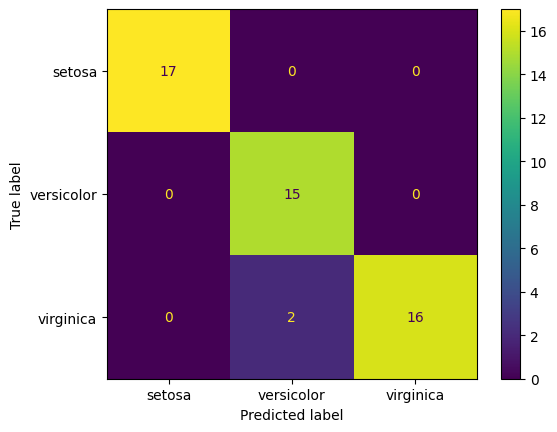

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay                              # load confusion Matrix visualization function
cm_disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ytest,ypredict),display_labels=iris.target_names)# make visualization object
cm_disp.plot()                                                                  # make plot
plt.show()                                                                      # make show plot

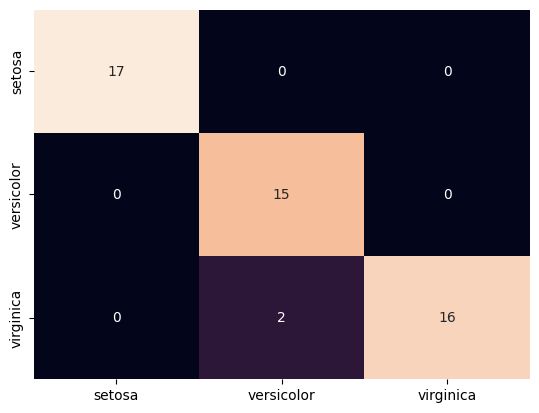

In [73]:
# make plot "Confusion Matrix" using heatmap
sns.heatmap(data=pd.DataFrame(confusion_matrix(ytest,ypredict),index=iris.target_names,columns=iris.target_names),annot=True,cbar=False)# make plot
plt.show()                                                                      # make show plot

# References / Further reading

* [Official python docs](https://docs.python.org/3/)
* [Official python tutorials](https://docs.python.org/3/tutorial/index.html)
* [Python Numpy Tutorial (with Jupyter and Colab) - Stanford - Spring 2022](https://cs231n.github.io/python-numpy-tutorial/)
* [NumPy: the absolute basics for beginners](https://numpy.org/devdocs/user/absolute_beginners.html)
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Matplotlib - Tutorials](https://matplotlib.org/stable/tutorials/index)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)